In [66]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [67]:
# função para converter s --> h, m, s
def converter_tempo(segundos_totais):
    horas = segundos_totais // 3600
    minutos = (segundos_totais % 3600) // 60
    segundos = segundos_totais % 60
    return horas, minutos, segundos

In [68]:
# configura pd para exibir todas as linhas
pd.set_option('display.max_rows', None)

In [69]:
# leitura dos conjuntos de dados
dfArmC = pd.read_csv('dados/armC.csv')
dfRiscvC = pd.read_csv('dados/riscvC.csv')
dfRiscvMPython = pd.read_csv('dados/riscvMPython.csv')

# Análise de dados - ARM Cortex M0+ - Linguagem C

In [70]:
# visão geral dos dados com tempo inicial do setpoint
dfArmC['sp_change'] = dfArmC['sp'].diff() != 0
sp_changes = dfArmC[dfArmC['sp_change']].copy()
trechos = sp_changes[['time', 'sp']]
num_trechos = len(trechos)
print(f"Total de amostras: {num_trechos}")
print("Início de cada amostra (time em ms) e respectivo valor de SP:")
print(trechos)

Total de amostras: 44
Início de cada amostra (time em ms) e respectivo valor de SP:
           time    sp
0          4396  10.0
487      308671  20.0
1088     613304  30.0
1689     917936  40.0
2290    1222549  50.0
2891    1527156  60.0
3492    1831798  70.0
4093    2136446  60.0
4694    2441049  50.0
5295    2745670  40.0
5896    3050331  30.0
6497    3354936  20.0
7098    3659600  10.0
7699    3964243  20.0
8300    4268882  30.0
8901    4573522  40.0
9502    4878213  50.0
10103   5182884  60.0
10704   5487515  70.0
11305   5791705  60.0
11906   6095352  50.0
12507   6399229  40.0
13108   6702893  30.0
13709   7006774  20.0
14310   7310336  10.0
14911   7614127  20.0
15512   7917831  30.0
16113   8221324  40.0
16714   8525007  50.0
17315   8828568  60.0
17916   9132356  70.0
18517   9435794  60.0
19118   9739343  50.0
19719  10042978  40.0
20320  10346109  30.0
20921  10649499  20.0
21522  10952761  10.0
22123  11255927  20.0
22724  11559230  30.0
23325  11860539  40.0
23926  1216189

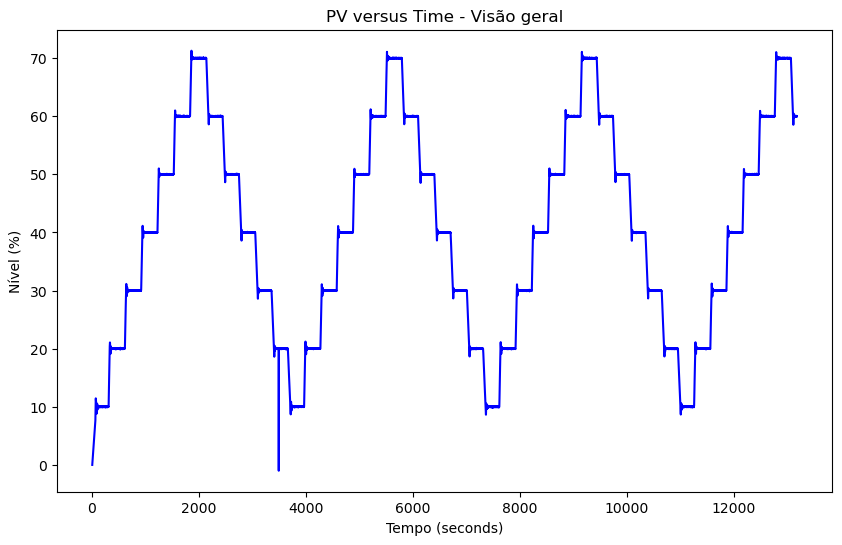

Duração da batelada: 3h39min32s


In [71]:
# plota o gráfico para toda batelada
dfArmC['time_sec'] = dfArmC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfArmC['time_sec'], dfArmC['pv'], label='PV', color='b')
plt.title('PV versus Time - Visão geral')
plt.xlabel('Tempo (seconds)')
plt.ylabel('Nível (%)')
plt.legend
plt.show()
# calcula e exibe a duração da batelada
horas, minutos, segundos = converter_tempo(dfArmC['time_sec'].iloc[-1] - dfArmC['time_sec'].iloc[0])
print(f"Duração da batelada: {int(horas)}h{int(minutos)}min{int(segundos)}s") 

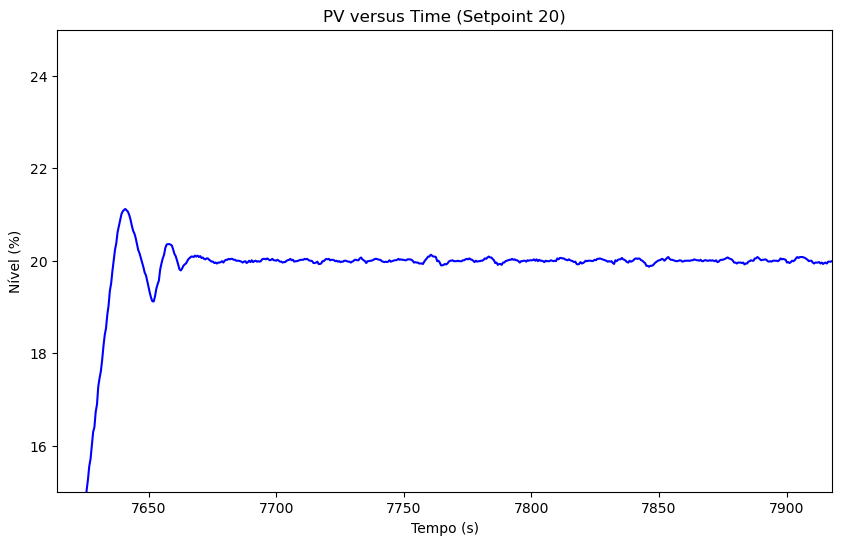

In [72]:
# plota o gráfico para um dos intervalos com setpoint 20
dfArmC['time_sec'] = dfArmC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfArmC['time_sec'], dfArmC['pv'], label='PV', color='b')
plt.title('PV versus Time (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([7614.127, 7917.831])
plt.ylim([15, 25])
plt.show()

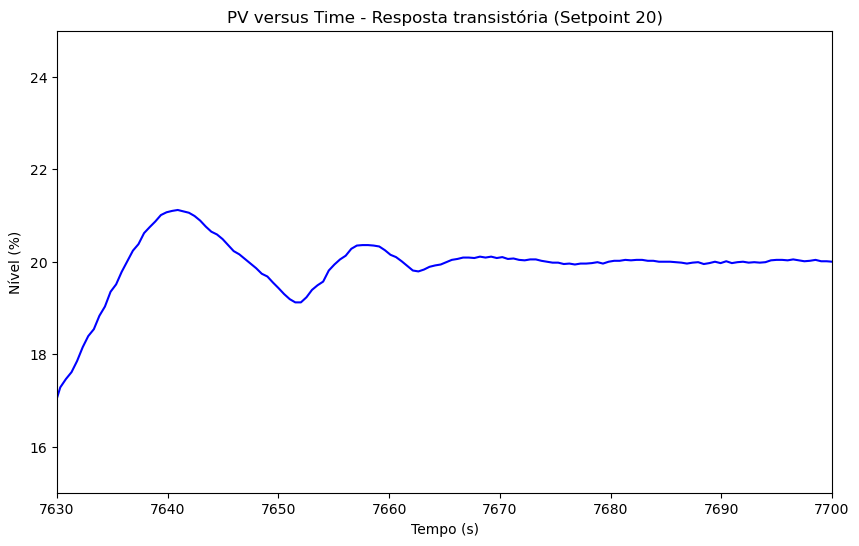

In [73]:
# gráfico para região com resposta transitória com setpoint 20
dfArmC['time_sec'] = dfArmC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfArmC['time_sec'], dfArmC['pv'], label='PV', color='b')
plt.title('PV versus Time - Resposta transistória (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([7630, 7700])
plt.ylim([15, 25])
# Exibir o gráfico
plt.show()

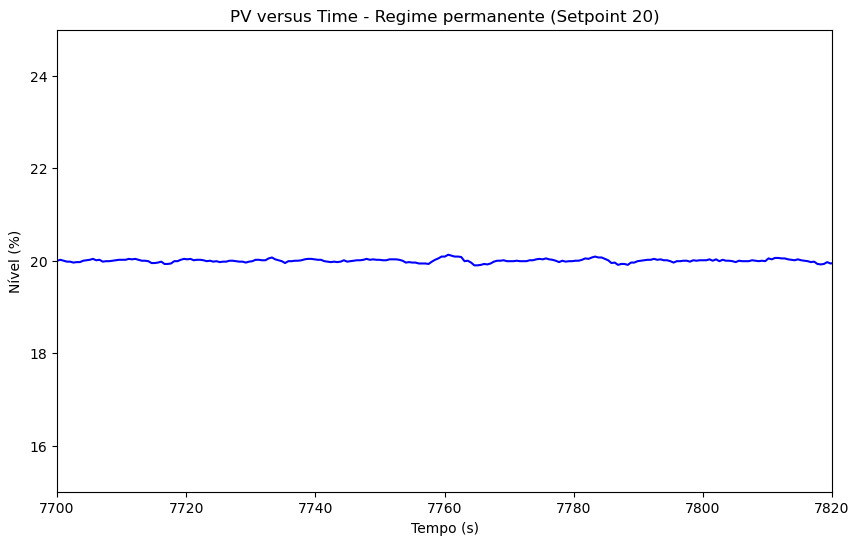

In [74]:
# gráfico para região de regime permanente com setpoint 20
dfArmC['time_sec'] = dfArmC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfArmC['time_sec'], dfArmC['pv'], label='PV', color='b')
plt.title('PV versus Time - Regime permanente (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([7700, 7820])
plt.ylim([15, 25])
# Exibir o gráfico
plt.show()

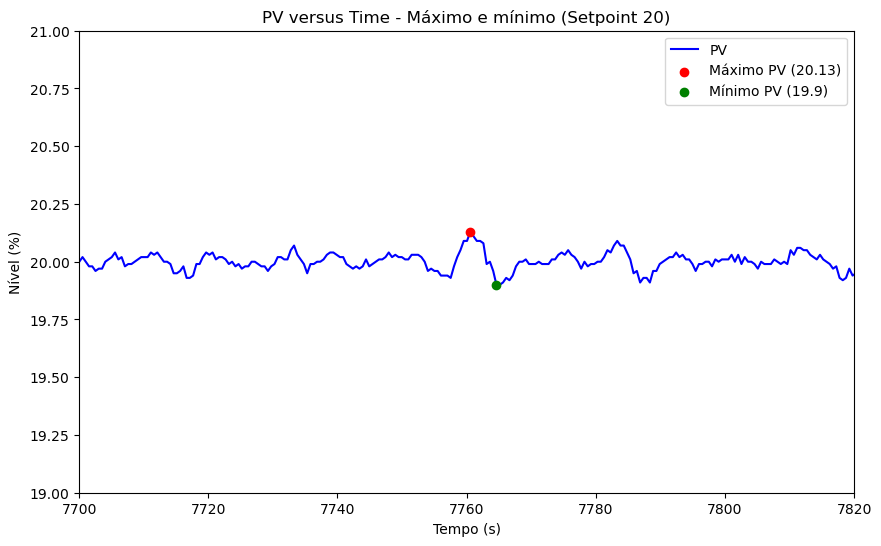

Valor máximo de PV no intervalo: 20.13 (Time: 7760.566 segundos)
Valor mínimo de PV no intervalo: 19.9 (Time: 7764.613 segundos)


In [75]:
# define o intervalo para o eixo x e y
xlim_min, xlim_max = 7700, 7820
ylim_min, ylim_max = 19, 21

# filtra o DataFrame para o intervalo especificado
filtered_df = dfArmC[(dfArmC['time_sec'] >= xlim_min) & (dfArmC['time_sec'] <= xlim_max) &
                 (dfArmC['pv'] >= ylim_min) & (dfArmC['pv'] <= ylim_max)]

# encontra os valores máximo e mínimo de PV no intervalo filtrado
pv_max = filtered_df['pv'].max()
pv_min = filtered_df['pv'].min()

# encontra os tempos correspondentes ao valor máximo e mínimo
time_max = filtered_df.loc[filtered_df['pv'].idxmax(), 'time_sec']
time_min = filtered_df.loc[filtered_df['pv'].idxmin(), 'time_sec']

# plota o gráfico
plt.figure(figsize=(10,6))
plt.plot(dfArmC['time_sec'], dfArmC['pv'], label='PV', color='b')

# destaca o valor máximo no intervalo
plt.scatter(time_max, pv_max, color='r', zorder=5, label=f'Máximo PV ({pv_max})')

# destaca o valor mínimo no intervalo
plt.scatter(time_min, pv_min, color='g', zorder=5, label=f'Mínimo PV ({pv_min})')

plt.xlim([xlim_min, xlim_max])
plt.ylim([ylim_min, ylim_max])
plt.title('PV versus Time - Máximo e mínimo (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend()
plt.show()

# exibe os valores máximo e mínimo
print(f"Valor máximo de PV no intervalo: {pv_max} (Time: {time_max} segundos)")
print(f"Valor mínimo de PV no intervalo: {pv_min} (Time: {time_min} segundos)")

# Análise de dados - RISC V - Linguagem C

In [76]:
# visão geral dos dados com tempo inicial do setpoint
dfRiscvC['sp_change'] = dfRiscvC['sp'].diff() != 0
sp_changes = dfRiscvC[dfRiscvC['sp_change']].copy()
trechos = sp_changes[['time', 'sp']]
num_trechos = len(trechos)
print(f"Total de amostras: {num_trechos}")
print("Início de cada amostra (time em ms) e respectivo valor de SP:")
print(trechos)

Total de amostras: 69
Início de cada amostra (time em ms) e respectivo valor de SP:
           time    sp
0         17192  10.0
577      308820  20.0
1178     612898  30.0
1779     917020  40.0
2380    1221099  50.0
2981    1525232  60.0
3582    1829345  70.0
4183    2133474  60.0
4784    2437606  50.0
5385    2741707  40.0
5986    3045794  30.0
6587    3349895  20.0
7188    3653987  10.0
7789    3958045  20.0
8390    4262111  30.0
8991    4566227  40.0
9592    4870298  50.0
10193   5174420  60.0
10794   5478509  70.0
11395   5782200  60.0
11996   6085975  50.0
12597   6389555  40.0
13198   6693017  30.0
13799   6996550  20.0
14400   7300190  10.0
15001   7603715  20.0
15602   7907111  30.0
16203   8210338  40.0
16804   8513368  50.0
17405   8816360  60.0
18006   9119506  70.0
18607   9422210  60.0
19208   9724808  50.0
19809  10027555  40.0
20410  10330242  30.0
21011  10632650  20.0
21612  10934917  10.0
22213  11237627  20.0
22814  11539685  30.0
23415  11841676  40.0
24016  1214366

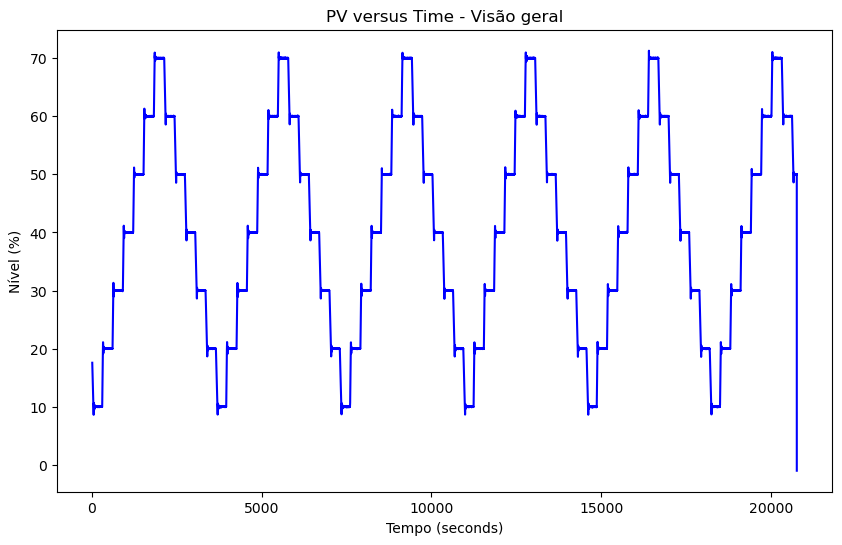

Duração da batelada: 5h45min32s


In [77]:
# plota o gráfico para toda batelada
dfRiscvC['time_sec'] = dfRiscvC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvC['time_sec'], dfRiscvC['pv'], label='PV', color='b')
plt.title('PV versus Time - Visão geral')
plt.xlabel('Tempo (seconds)')
plt.ylabel('Nível (%)')
plt.legend
plt.show()
# calcula e exibe a duração da batelada
horas, minutos, segundos = converter_tempo(dfRiscvC['time_sec'].iloc[-1] - dfRiscvC['time_sec'].iloc[0])
print(f"Duração da batelada: {int(horas)}h{int(minutos)}min{int(segundos)}s") 

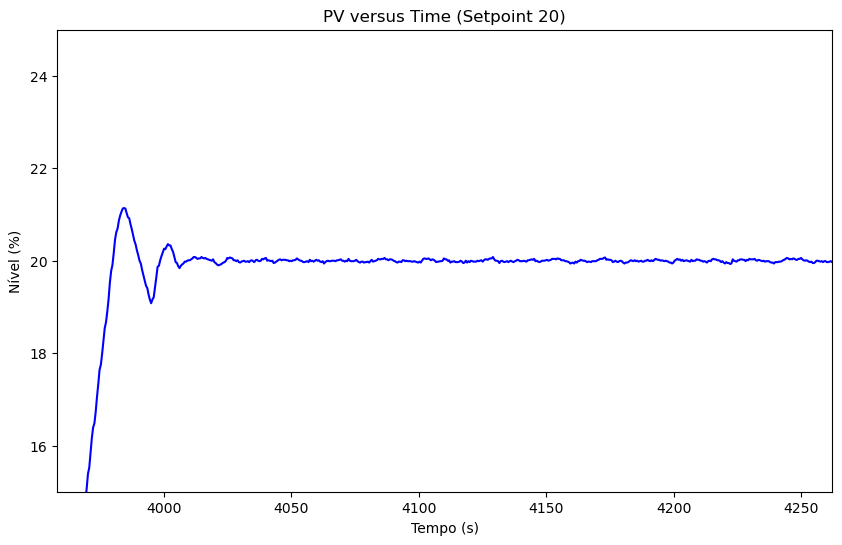

In [78]:
# plota o gráfico para um dos intervalos com setpoint 20
dfRiscvC['time_sec'] = dfRiscvC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvC['time_sec'], dfRiscvC['pv'], label='PV', color='b')
plt.title('PV versus Time (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([3958.045, 4262.111])
plt.ylim([15, 25])
plt.show()

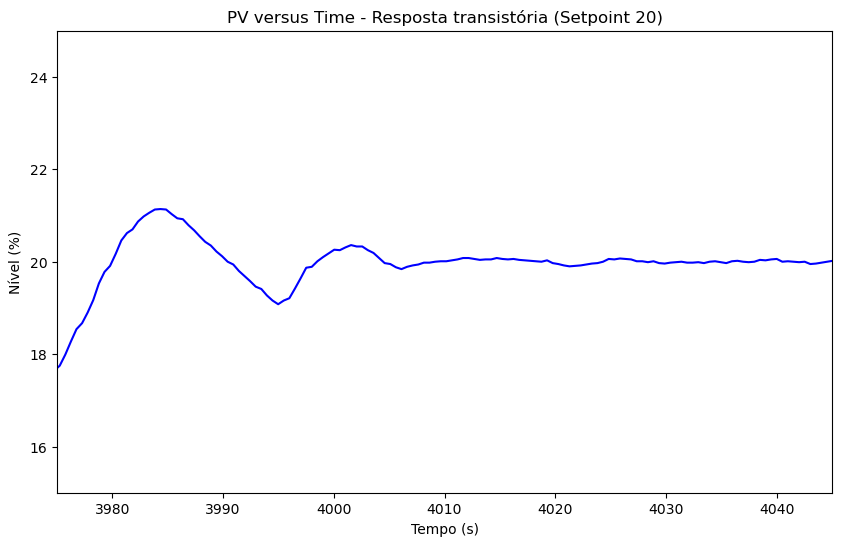

In [79]:
# gráfico para região com resposta transitória com setpoint 20
dfRiscvC['time_sec'] = dfRiscvC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvC['time_sec'], dfRiscvC['pv'], label='PV', color='b')
plt.title('PV versus Time - Resposta transistória (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([3975, 4045])
plt.ylim([15, 25])
# Exibir o gráfico
plt.show()

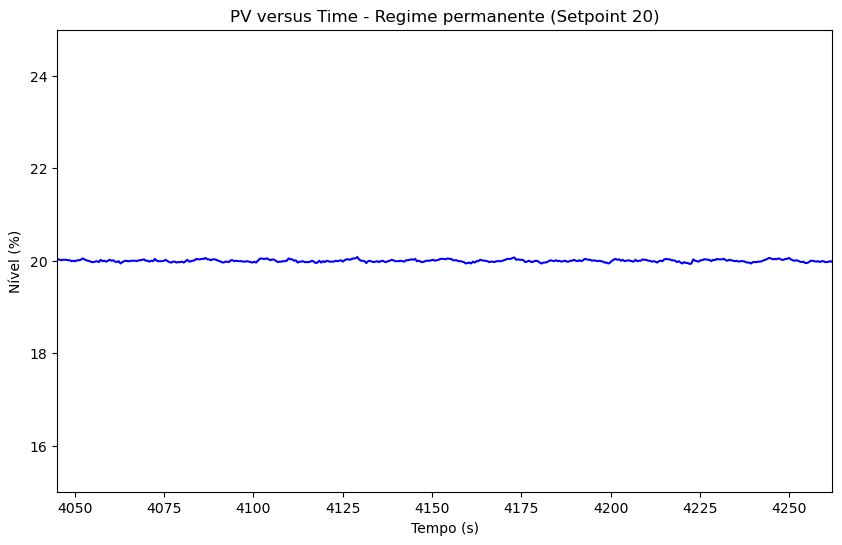

In [80]:
# gráfico para região de regime permanente com setpoint 20
dfRiscvC['time_sec'] = dfRiscvC['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvC['time_sec'], dfRiscvC['pv'], label='PV', color='b')
plt.title('PV versus Time - Regime permanente (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([4045, 4262])
plt.ylim([15, 25])
# Exibir o gráfico
plt.show()

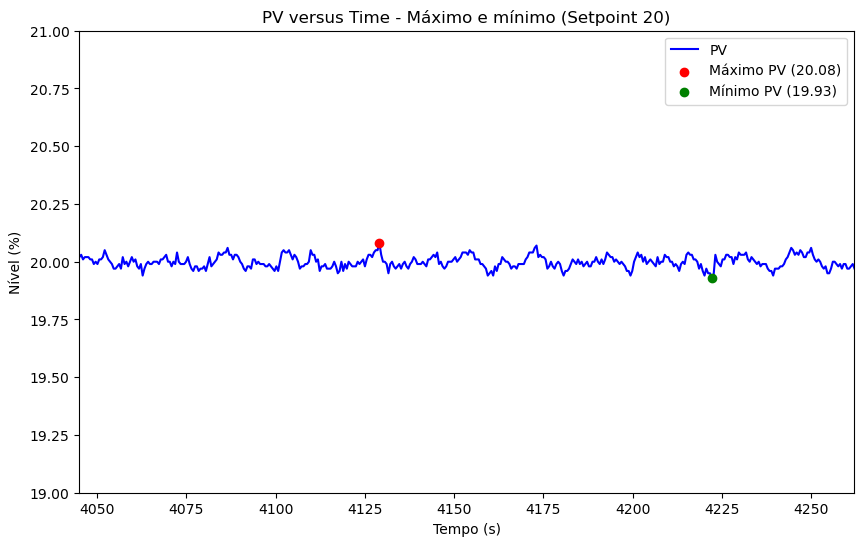

Valor máximo de PV no intervalo: 20.08 (Time: 4129.068 segundos)
Valor mínimo de PV no intervalo: 19.93 (Time: 4222.13 segundos)


In [81]:
# define o intervalo para o eixo x e y
xlim_min, xlim_max = 4045, 4262
ylim_min, ylim_max = 19, 21

# filtra o DataFrame para o intervalo especificado
filtered_df = dfRiscvC[(dfRiscvC['time_sec'] >= xlim_min) & (dfRiscvC['time_sec'] <= xlim_max) &
                 (dfRiscvC['pv'] >= ylim_min) & (dfRiscvC['pv'] <= ylim_max)]

# encontra os valores máximo e mínimo de PV no intervalo filtrado
pv_max = filtered_df['pv'].max()
pv_min = filtered_df['pv'].min()

# encontra os tempos correspondentes ao valor máximo e mínimo
time_max = filtered_df.loc[filtered_df['pv'].idxmax(), 'time_sec']
time_min = filtered_df.loc[filtered_df['pv'].idxmin(), 'time_sec']

# plota o gráfico
plt.figure(figsize=(10,6))
plt.plot(dfRiscvC['time_sec'], dfRiscvC['pv'], label='PV', color='b')

# destaca o valor máximo no intervalo
plt.scatter(time_max, pv_max, color='r', zorder=5, label=f'Máximo PV ({pv_max})')

# destaca o valor mínimo no intervalo
plt.scatter(time_min, pv_min, color='g', zorder=5, label=f'Mínimo PV ({pv_min})')

plt.xlim([xlim_min, xlim_max])
plt.ylim([ylim_min, ylim_max])
plt.title('PV versus Time - Máximo e mínimo (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend()
plt.show()

# Exibe os valores máximo e mínimo
print(f"Valor máximo de PV no intervalo: {pv_max} (Time: {time_max} segundos)")
print(f"Valor mínimo de PV no intervalo: {pv_min} (Time: {time_min} segundos)")

# Análise de dados - RISC V - Linguagem microPython

In [82]:
# visão geral dos dados com tempo inicial do setpoint
dfRiscvMPython['time'] = dfRiscvMPython['time'] * 500
dfRiscvMPython['sp_change'] = dfRiscvMPython['sp'].diff() != 0
sp_changes = dfRiscvMPython[dfRiscvMPython['sp_change']].copy()
trechos = sp_changes[['time', 'sp']]
num_trechos = len(trechos)
print(f"Total de amostras: {num_trechos}")
print("Início de cada amostra (time em ms) e respectivo valor de SP:")
print(trechos)

Total de amostras: 56
Início de cada amostra (time em ms) e respectivo valor de SP:
           time  sp
0           500  10
601      301000  20
1202     601500  30
1803     902000  40
2404    1202500  50
3005    1503000  60
3606    1803500  70
4207    2104000  60
4808    2404500  50
5409    2705000  40
6010    3005500  30
6611    3306000  20
7212    3606500  10
7813    3907000  20
8414    4207500  30
9015    4508000  40
9616    4808500  50
10217   5109000  60
10818   5409500  70
11419   5710000  60
12020   6010500  50
12621   6311000  40
13222   6611500  30
13823   6912000  20
14424   7212500  10
15025   7513000  20
15626   7813500  30
16227   8114000  40
16828   8414500  50
17429   8715000  60
18030   9015500  70
18631   9316000  60
19232   9616500  50
19833   9917000  40
20434  10217500  30
21035  10518000  20
21636  10818500  10
22237  11119000  20
22838  11419500  30
23439  11720000  40
24040  12020500  50
24641  12321000  60
25242  12621500  70
25843  12922000  60
26444  13222500 

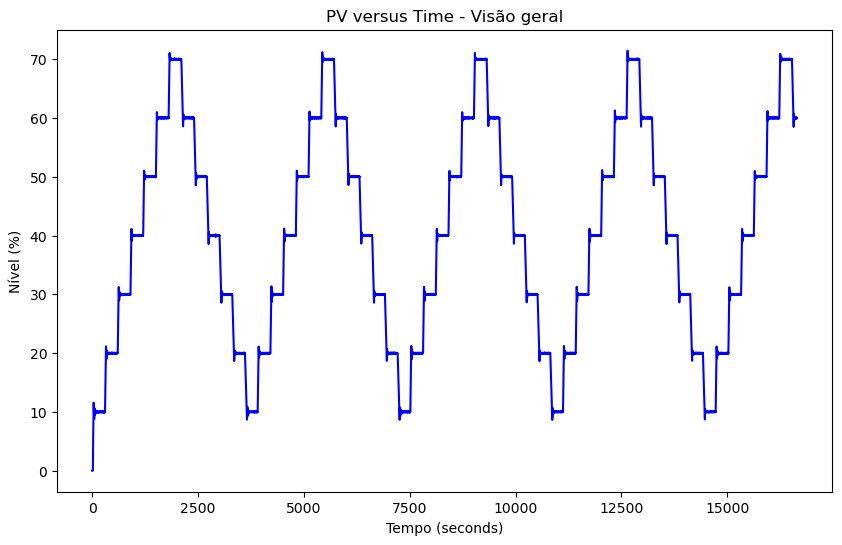

Duração da batelada: 4h37min22s


In [83]:
# plota o gráfico para toda batelada
dfRiscvMPython['time_sec'] = dfRiscvMPython['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvMPython['time_sec'], dfRiscvMPython['pv'], label='PV', color='b')
plt.title('PV versus Time - Visão geral')
plt.xlabel('Tempo (seconds)')
plt.ylabel('Nível (%)')
plt.legend
plt.show()
# calcula e exibe a duração da batelada
horas, minutos, segundos = converter_tempo(dfRiscvMPython['time_sec'].iloc[-1] - dfRiscvMPython['time_sec'].iloc[0])
print(f"Duração da batelada: {int(horas)}h{int(minutos)}min{int(segundos)}s") 

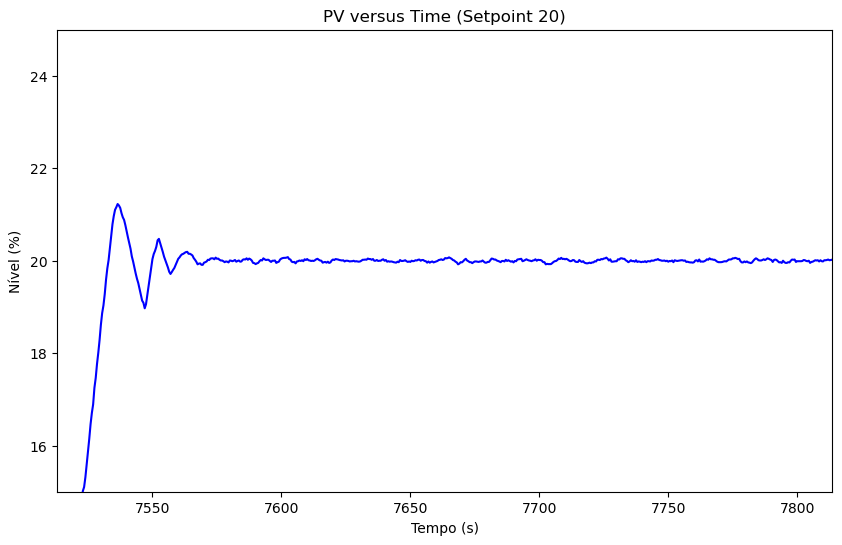

In [84]:
# plota o gráfico para um dos intervalos com setpoint 20
dfRiscvMPython['time_sec'] = dfRiscvMPython['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvMPython['time_sec'], dfRiscvMPython['pv'], label='PV', color='b')
plt.title('PV versus Time (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([7513.000, 7813.500])
plt.ylim([15, 25])
plt.show()

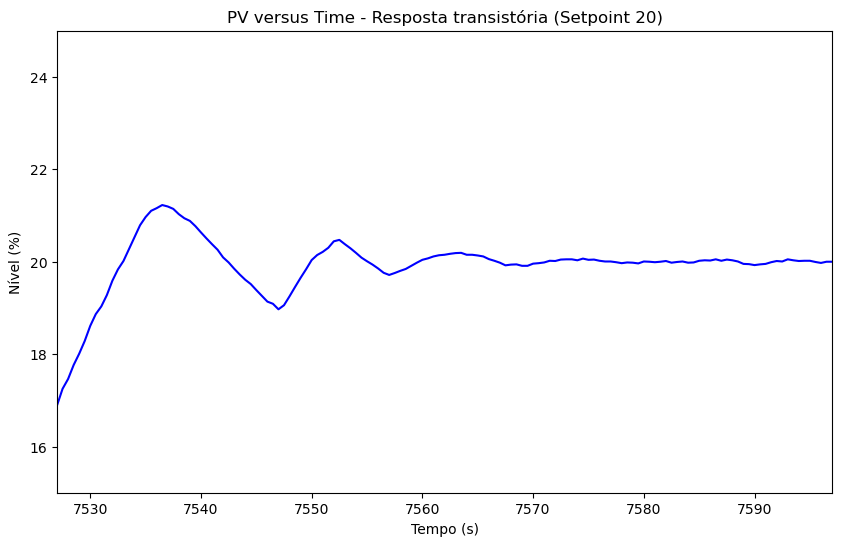

In [85]:
# gráfico para região com resposta transitória com setpoint 20
dfRiscvMPython['time_sec'] = dfRiscvMPython['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvMPython['time_sec'], dfRiscvMPython['pv'], label='PV', color='b')
plt.title('PV versus Time - Resposta transistória (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([7527, 7597])
plt.ylim([15, 25])
# Exibir o gráfico
plt.show()

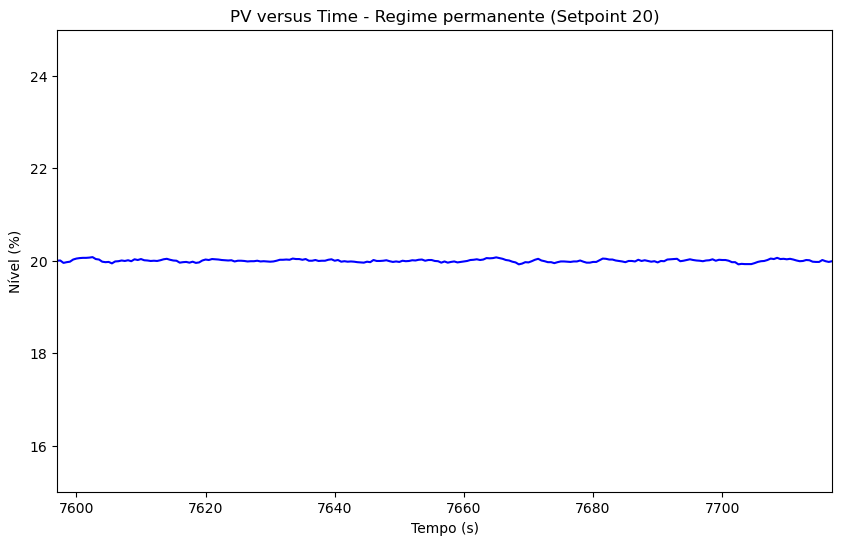

In [86]:
# gráfico para região de regime permanente com setpoint 20
dfRiscvMPython['time_sec'] = dfRiscvMPython['time'] / 1000
plt.figure(figsize=(10,6))
plt.plot(dfRiscvMPython['time_sec'], dfRiscvMPython['pv'], label='PV', color='b')
plt.title('PV versus Time - Regime permanente (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend
plt.xlim([7597, 7717])
plt.ylim([15, 25])
# Exibir o gráfico
plt.show()

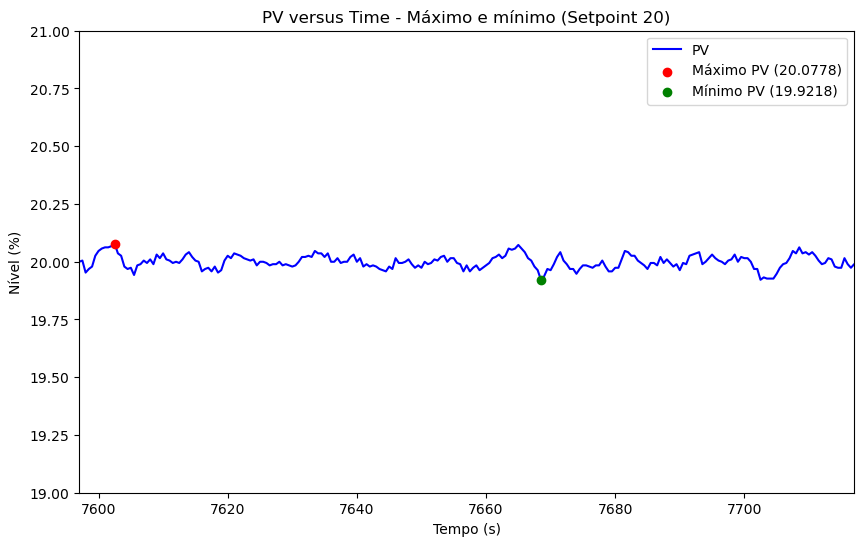

Valor máximo de PV no intervalo: 20.0778 (Time: 7602.5 segundos)
Valor mínimo de PV no intervalo: 19.9218 (Time: 7668.5 segundos)


In [87]:
# define o intervalo para o eixo x e y
xlim_min, xlim_max = 7597, 7717
ylim_min, ylim_max = 19, 21

# filtra o DataFrame para o intervalo especificado
filtered_df = dfRiscvMPython[(dfRiscvMPython['time_sec'] >= xlim_min) & (dfRiscvMPython['time_sec'] <= xlim_max) &
                 (dfRiscvMPython['pv'] >= ylim_min) & (dfRiscvMPython['pv'] <= ylim_max)]

# encontra os valores máximo e mínimo de PV no intervalo filtrado
pv_max = filtered_df['pv'].max()
pv_min = filtered_df['pv'].min()

# encontra os tempos correspondentes ao valor máximo e mínimo
time_max = filtered_df.loc[filtered_df['pv'].idxmax(), 'time_sec']
time_min = filtered_df.loc[filtered_df['pv'].idxmin(), 'time_sec']

# plota o gráfico
plt.figure(figsize=(10,6))
plt.plot(dfRiscvMPython['time_sec'], dfRiscvMPython['pv'], label='PV', color='b')

# destaca o valor máximo no intervalo
plt.scatter(time_max, pv_max, color='r', zorder=5, label=f'Máximo PV ({pv_max})')

# destaca o valor mínimo no intervalo
plt.scatter(time_min, pv_min, color='g', zorder=5, label=f'Mínimo PV ({pv_min})')

plt.xlim([xlim_min, xlim_max])
plt.ylim([ylim_min, ylim_max])
plt.title('PV versus Time - Máximo e mínimo (Setpoint 20)')
plt.xlabel('Tempo (s)')
plt.ylabel('Nível (%)')
plt.legend()
plt.show()

# exibe os valores máximo e mínimo
print(f"Valor máximo de PV no intervalo: {pv_max} (Time: {time_max} segundos)")
print(f"Valor mínimo de PV no intervalo: {pv_min} (Time: {time_min} segundos)")

# Análise de desempenho comparativo (Setpoint 20)

In [88]:
# Definir os intervalos de tempo
# converte para milissegundos
intervalo_armC = (7624.127 * 1000, 7917.831 * 1000)
intervalo_riscvC = (3968.045 * 1000, 4262.111 * 1000)
intervalo_riscvMPython = (7518.000 * 1000, 7808.500 * 1000)

# filtrar os DataFrames pelos intervalos de tempo
dfArmC_filtered = dfArmC[(dfArmC['time'] >= intervalo_armC[0]) & (dfArmC['time'] <= intervalo_armC[1])]
dfRiscvC_filtered = dfRiscvC[(dfRiscvC['time'] >= intervalo_riscvC[0]) & (dfRiscvC['time'] <= intervalo_riscvC[1])]
dfRiscvMPython_filtered = dfRiscvMPython[(dfRiscvMPython['time'] >= intervalo_riscvMPython[0]) & (dfRiscvMPython['time'] <= intervalo_riscvMPython[1])]

# Contar o número de registros em cada intervalo
num_registros_armC = len(dfArmC_filtered)
num_registros_riscvC = len(dfRiscvC_filtered)
num_registros_riscvMPython = len(dfRiscvMPython_filtered)

# Calcular os valores máximos e mínimos de PV para dfArmC
pv_max_armC = dfArmC_filtered['pv'].max()
pv_min_armC = dfArmC_filtered['pv'].min()

# Calcular os valores máximos e mínimos de PV para dfRiscvC
pv_max_riscvC = dfRiscvC_filtered['pv'].max()
pv_min_riscvC = dfRiscvC_filtered['pv'].min()

# Calcular os valores máximos e mínimos de PV para dfArmC
pv_max_riscvMPython = dfRiscvMPython_filtered['pv'].max()
pv_min_riscvMPython = dfRiscvMPython_filtered['pv'].min()

# Exibir os resultados
print(f"Número de registros para dfArmC no intervalo {intervalo_armC[0]} a {intervalo_armC[1]} ms: {num_registros_armC}")
print(f"Valor máximo de PV: {pv_max_armC}")
print(f"Valor mínimo de PV: {pv_min_armC}\n")
print('=' * 100)
print(f"Número de registros para dfRiscvC no intervalo {intervalo_riscvC[0]} a {intervalo_riscvC[1]} ms: {num_registros_riscvC}")
print(f"Valor máximo de PV: {pv_max_riscvC}")
print(f"Valor mínimo de PV: {pv_min_riscvC}\n")
print('=' * 100)
print(f"Número de registros para dfRiscvMPython no intervalo {intervalo_riscvMPython[0]} a {intervalo_riscvMPython[1]} ms: {num_registros_riscvMPython}")
print(f"Valor máximo de PV: {pv_max_riscvMPython}")
print(f"Valor mínimo de PV: {pv_min_riscvMPython}\n")
print('=' * 100)

# faz uma cópia do DataFrame original
dfArmC_rounded = dfArmC_filtered.copy()
dfRiscvC_rounded = dfRiscvC_filtered.copy()
dfRiscvMPython_rounded = dfRiscvMPython_filtered.copy()

# arredonda a coluna 'pv' da cópia para uma casa decimal
dfArmC_rounded['pv'] = dfArmC_rounded['pv'].round(1)
dfRiscvC_rounded['pv'] = dfRiscvC_rounded['pv'].round(1)
dfRiscvMPython_rounded['pv'] = dfRiscvMPython_rounded['pv'].round(1)

# encontrar os valores comuns entre os três DataFrames
valores_comuns = set(dfArmC_rounded['pv']).intersection(dfRiscvC_rounded['pv']).intersection(dfRiscvMPython_rounded['pv'])

# verifica se há valores comuns e, se houver, encontrar o menor valor
if valores_comuns:
    menor_valor_comum = min(valores_comuns)
    print("Menor valor comum de pv nos três DataFrames:", menor_valor_comum)

    # encontra o índice do menor valor comum em cada DataFrame
    indice_dfArmC = dfArmC_rounded[dfArmC_rounded['pv'] == menor_valor_comum]['time'].tolist()
    indice_dfRiscvC = dfRiscvC_rounded[dfRiscvC_rounded['pv'] == menor_valor_comum]['time'].tolist()
    indice_dfRiscvMPython = dfRiscvMPython_rounded[dfRiscvMPython_rounded['pv'] == menor_valor_comum]['time'].tolist()

    # Exibir os índices
    print(f"Índice(s) do menor valor comum no dfArmC_rounded: {indice_dfArmC}")
    print(f"Índice(s) do menor valor comum no dfRiscvC_rounded: {indice_dfRiscvC}")
    print(f"Índice(s) do menor valor comum no dfRiscvMPython_rounded: {indice_dfRiscvMPython}")
else:
    print("Não há valores comuns entre os três DataFrames.")

Número de registros para dfArmC no intervalo 7624127.0 a 7917831.0 ms: 582
Valor máximo de PV: 21.12
Valor mínimo de PV: 14.24

Número de registros para dfRiscvC no intervalo 3968045.0 a 4262111.0 ms: 582
Valor máximo de PV: 21.14
Valor mínimo de PV: 14.25

Número de registros para dfRiscvMPython no intervalo 7518000.0 a 7808500.0 ms: 582
Valor máximo de PV: 21.227
Valor mínimo de PV: 12.0958

Menor valor comum de pv nos três DataFrames: 14.8
Índice(s) do menor valor comum no dfArmC_rounded: [7625236]
Índice(s) do menor valor comum no dfRiscvC_rounded: [3969177]
Índice(s) do menor valor comum no dfRiscvMPython_rounded: [7522500]


In [89]:
# define tempo inicial
tempo_inicial_armC = 7625236
tempo_inicial_riscvC = 3969177
tempo_inicial_riscvMPython = 7522500

# seleciona os registros a partir do tempo inicial
dfArmC_filtered = dfArmC_filtered[(dfArmC_filtered['time'] >= tempo_inicial_armC) & (dfArmC_filtered['pv'] >= 19)]
dfRiscvC_filtered = dfRiscvC_filtered[(dfRiscvC_filtered['time'] >= tempo_inicial_riscvC) & (dfRiscvC_filtered['pv'] >= 19)]
dfRiscvMPython_filtered = dfRiscvMPython_filtered[(dfRiscvMPython_filtered['time'] >= tempo_inicial_riscvMPython) & (dfRiscvMPython_filtered['pv'] >= 19)]

# seleciona os primeiros 500 registros
dfArmC_top500 = dfArmC_filtered.head(500)
dfRiscvC_top500 = dfRiscvC_filtered.head(500)
dfRiscvMPython_top500 = dfRiscvMPython_filtered.head(500)

# salva os novos DataFrames em arquivos CSV
dfArmC_top500.to_csv('dados/dfArmC_top500.csv', index=False)
dfRiscvC_top500.to_csv('dados/dfRiscvC_top500.csv', index=False)
dfRiscvMPython_top500.to_csv('dados/dfRiscvMPython_top500.csv', index=False)

# leitura dos conjuntos de dados
dfArmC_SP20 = pd.read_csv('dados/dfArmC_top500.csv')
dfRiscvC_SP20 = pd.read_csv('dados/dfRiscvC_top500.csv')
dfRiscvMPython_SP20 = pd.read_csv('dados/dfRiscvMPython_top500.csv')

In [90]:
# ajusta os df para iniciar em 0
dfArmC_SP20['time'] = dfArmC_SP20['time'] - dfArmC_SP20['time'].iloc[0]
dfRiscvC_SP20['time'] = dfRiscvC_SP20['time'] - dfRiscvC_SP20['time'].iloc[0]
dfRiscvMPython_SP20['time'] = dfRiscvMPython_SP20['time'] - dfRiscvMPython_SP20['time'].iloc[0]

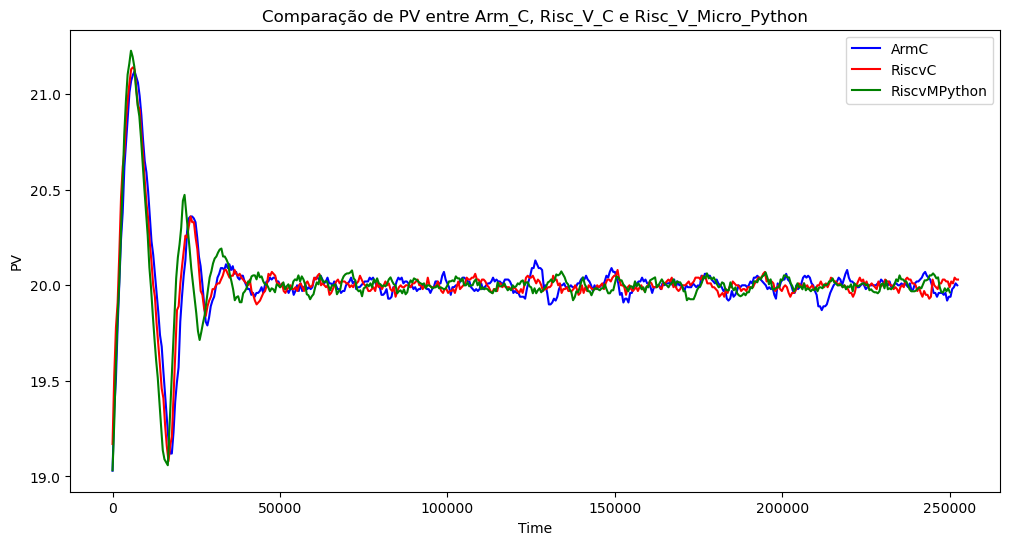

In [91]:
# plota o gráfico
plt.figure(figsize=(12, 6))

plt.plot(dfArmC_SP20['time'], dfArmC_SP20['pv'], label='ArmC', color='b', linestyle='-')
plt.plot(dfRiscvC_SP20['time'], dfRiscvC_SP20['pv'], label='RiscvC', color='r', linestyle='-')
plt.plot(dfRiscvMPython_SP20['time'], dfRiscvMPython_SP20['pv'], label='RiscvMPython', color='g', linestyle='-')

# Adicionar título e rótulos aos eixos
plt.title('Comparação de PV entre Arm_C, Risc_V_C e Risc_V_Micro_Python')
plt.xlabel('Time')
plt.ylabel('PV')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [92]:
# cálculo da Soma dos Erros Quadráticos (SSE)
y_ref = dfArmC_SP20['pv']
y_riscvC = dfRiscvC_SP20['pv']
y_riscvMPython = dfRiscvMPython_SP20['pv']

sse_riscvC = ((y_ref - y_riscvC) ** 2).sum()
sse_riscvMPython = ((y_ref - y_riscvMPython) ** 2).sum()

print("Soma dos Erros Quadráticos (SSE) para RiscvC_SP20:", sse_riscvC)
print("Soma dos Erros Quadráticos (SSE) para RiscvMPython_SP20:", sse_riscvMPython)

Soma dos Erros Quadráticos (SSE) para RiscvC_SP20: 2.0315000000000056
Soma dos Erros Quadráticos (SSE) para RiscvMPython_SP20: 7.074120479999994
